## Gambler's Problem  
  
If the coins comes up heads, he wins as many dollars as he has staked on that flip.
  
- <b>Terminations</b>
    - Game ends when gambler wins by reaching goal of \$100  
    - loss by running out of money  
- <b>States</b>: gambler's capital, $s\in \{1, 2, \cdots, 99\}$  
  
- <b>Actions</b>: stakes, $a\in \{0, 1, \cdots, {\rm min}(s, 100-s)\}$  
  
- <b>Rewards</b>  
    - 0 on all transitions 
    - reaches \$100, $+1$  
  
  
- <b>state-value function</b>  
    - probability of winning from each state  
  
- <b>A policy</b>  
    - The optimal policy maximizes the probability of reaching the goal.  
  
Let $p_h$ denote the probability of the coin coming up heads. Shows the change in the value function over successive sweeps of value iteration, and the final policy found, for the case of $p_h=0.4$. This policy is optimal, but not unique. In fact, there is a whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function. Can you guess what the entire family looks like?

len 34


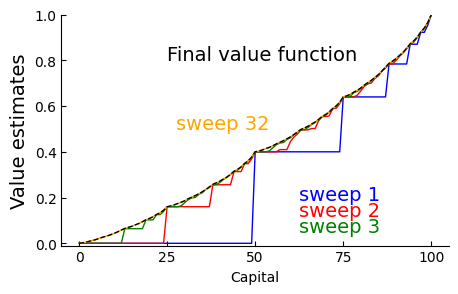

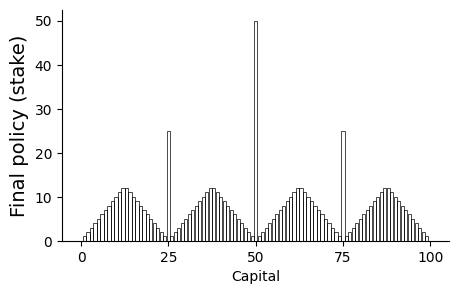

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

current_dir = os.getcwd()

GOAL = 100                          # Goal
STATES = np.arange(GOAL + 1)        # all states, including state 0 and state 100
HEAD_PROB = 0.4                     # probability of coin coming up heads
state_value = np.zeros(GOAL + 1)    # state value
state_value[GOAL] = 1.0

sweeps_history = []

while True:                         # value iteration
    old_state_value = state_value.copy()
    sweeps_history.append(old_state_value)

    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)   # possible action
        action_returns = []                                 # record each action's expectation of winning 
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
        new_value = np.max(action_returns)
        state_value[state] = new_value
    delta = abs(state_value - old_state_value).max()
    if delta < 1e-25:
        sweeps_history.append(state_value)
        break

# optimal policy
policy = np.zeros(GOAL + 1)
for state in STATES[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    action_returns = []
    for action in actions:
        action_returns.append(
            HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])

    policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]



fig, ax = plt.subplots(figsize = (5,3))
col = ['b','r','g','orange','k']
sweep_list = [1, 2, 3, 32]
idx = 0

print('len',len(sweeps_history))
for sweep, state_value in enumerate(sweeps_history):
    if sweep in sweep_list:
        ax.plot(state_value, col[idx], linewidth = 1)
        idx += 1

ax.plot(state_value, col[-1], linestyle = '--',linewidth = 1)

ax.text(25,0.8, 'Final value function', fontsize = 14, color = 'k')
ax.text(27.5, 0.5, 'sweep 32', fontsize = 14, color = 'orange')
ax.text(62.5,0.05, 'sweep 3', fontsize = 14, color = 'g')
ax.text(62.5, 0.12, 'sweep 2', fontsize = 14, color = 'r')
ax.text(62.5, 0.19, 'sweep 1', fontsize = 14, color = 'b')

ax.set_ylim(-0.01,1)
ax.set_xticks(np.arange(0, len(state_value), 25))
ax.set_ylabel('Value estimates', fontsize = 14)
ax.set_xlabel('Capital')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(direction = 'in', which = 'both', axis = 'both')

plt.savefig(f'{current_dir}/gamblerGame_value.png', dpi=70, bbox_inches='tight')
plt.show()
plt.close()


fig, ax = plt.subplots(figsize = (5,3))

ax.bar(STATES, policy, width=0.9, align='center', edgecolor='black', facecolor='none', linewidth=0.5)
ax.set_xticks(np.arange(0, len(STATES), 25))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Capital')
ax.set_ylabel('Final policy (stake)',fontsize = 14)
plt.savefig(f'{current_dir}/gamblerGame_policy.png', dpi=80, bbox_inches='tight')
plt.show()

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import os

current_dir = os.getcwd()


def gambler_prob(prob: float = 0.4, show_images: bool = False):
    prob = prob                    # probability of coin coming up heads
    
    GOAL = 100 
    STATES = np.arange(GOAL + 1)        # all states, including state 0 and state 100

    state_value = np.zeros(GOAL + 1)    # state value
    state_value[GOAL] = 1.0
    sweeps_history = []
    

    while True:                         # value iteration
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)

        for state in STATES[1:GOAL]:
            actions = np.arange(min(state, GOAL - state) + 1)   # possible action
            action_returns = []                                 # record each action's expectation of winning 
            for action in actions:
                action_returns.append(
                    prob * state_value[state + action] + (1 - prob) * state_value[state - action])
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-20:
            sweeps_history.append(state_value)
            break

    # optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                prob * state_value[state + action] + (1 - prob) * state_value[state - action])

        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]


    if show_images:
        fig, ax = plt.subplots(figsize = (5,3))
        

        print('len',len(sweeps_history))
        for state_value in sweeps_history: 
            ax.plot(state_value,linewidth = 1)
                
        ax.plot(state_value, linestyle = '--',linewidth = 1)

        ax.set_ylim(-0.01,1)
        ax.set_xticks(np.arange(0, len(state_value), 25))
        ax.set_ylabel('Value estimates', fontsize = 14)
        ax.set_xlabel('Capital')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.tick_params(direction = 'in', which = 'both', axis = 'both')

        # plt.savefig(f'{current_dir}/gamblerGame_value.png', dpi=70, bbox_inches='tight')
        plt.show()
        plt.close()


        fig, ax = plt.subplots(figsize = (5,3))

        ax.bar(STATES, policy, width=0.9, align='center', edgecolor='black', facecolor='none', linewidth=0.5)
        ax.set_xticks(np.arange(0, len(STATES), 25))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.set_xlabel('Capital')
        ax.set_ylabel('Final policy (stake)',fontsize = 14)
        # plt.savefig(f'{current_dir}/gamblerGame_policy.png', dpi=80, bbox_inches='tight')
        plt.show()
    
    return state_value

## Value estimates over vary $p_h$

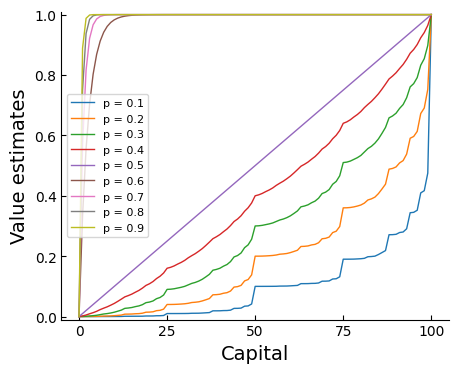

In [68]:
probs = [i * 0.1 for i in range(1, 10)]
state_value_list = []


for prob in probs:
    state_value_list.append(gambler_prob(prob))

fig, ax = plt.subplots(figsize = (5, 4))
for i, state_value in enumerate(state_value_list):
    ax.plot(state_value, linewidth = 1, label = f'p = {probs[i]:.1f}')
    

ax.set_ylim(-0.01, 1.01)
ax.set_xticks(np.arange(0, len(state_value), 25))
ax.set_ylabel('Value estimates', fontsize = 14)
ax.set_xlabel('Capital', fontsize = 14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(direction = 'in', which = 'both', axis = 'both')

ax.legend(loc = 'best', fontsize = 8)
plt.show()
plt.savefig(f'{current_dir}/gamblerGame_value.png', dpi=70, bbox_inches='tight')
plt.close()

